In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
train = pd.read_csv("data/Big Mart Sales/train.csv")
test = pd.read_csv("data/Big Mart Sales/test.csv")

In [13]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
test['Item_Weight'].fillna((test['Item_Weight'].mean()), inplace=True) 
number =LabelEncoder()
### reducing fat content to only two categories 

train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat','LF'], ['Low Fat','Low Fat']) 
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['reg'], ['Regular']) 
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat','LF'], ['Low Fat','Low Fat']) 
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['reg'], ['Regular']) 
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year'] 
test['Outlet_Establishment_Year'] = 2013 - test['Outlet_Establishment_Year'] 

train['Outlet_Size'].fillna('Small',inplace=True)
test['Outlet_Size'].fillna('Small',inplace=True)

train['Item_Visibility'] = np.sqrt(train['Item_Visibility'])
test['Item_Visibility'] = np.sqrt(test['Item_Visibility'])

col = ['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Fat_Content']
test['Item_Outlet_Sales'] = 0
# combi = train.append(test)
combi = train
for i in col:
 combi[i] = number.fit_transform(combi[i].astype('str'))
 combi[i] = combi[i].astype('object')
train = combi[:train.shape[0]]
test = combi[train.shape[0]:]
test.drop('Item_Outlet_Sales',axis=1,inplace=True)
## removing id variables 

tpot_train = train.drop(['Outlet_Identifier','Item_Type','Item_Identifier'],axis=1)
tpot_test = test.drop(['Outlet_Identifier','Item_Type','Item_Identifier'],axis=1)
target = tpot_train['Item_Outlet_Sales']
tpot_train.drop('Item_Outlet_Sales',axis=1,inplace=True)
# finally building model using tpot library

from tpot import TPOTRegressor
X_train, X_test, y_train, y_test = train_test_split(tpot_train, target,
 train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print( tpot.score(X_test, y_test))
tpot.export('tpot_boston_pipeline.py')

C:\Users\26921\AppData\Local\Temp\ipykernel_2932\1251425602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
C:\Users\26921\AppData\Local\Temp\ipykernel_2932\1251425602.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1161933.7162781341

Generation 2 - Current best internal CV score: -1160128.3947090865

Generation 3 - Current best internal CV score: -1160128.3947090865

Generation 4 - Current best internal CV score: -1160128.3947090865

Generation 5 - Current best internal CV score: -1160128.3947090865

Best pipeline: ExtraTreesRegressor(RidgeCV(RidgeCV(input_matrix)), bootstrap=True, max_features=0.3, min_samples_leaf=12, min_samples_split=8, n_estimators=100)
-1166540.180878915


d:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


模拟退火算法（Simulate Anneal，SA）

In [ ]:
import math
import random


def y(x):   # 函数y即能量E
    return x + 10 * math.sin(5 * x) + 7 * math.cos(4 * x)

def is_acceptable(delta_E,tmp,k=1):     # 是否可采纳
    if delta_E<0:   # ΔE<0，直接采纳
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求概率
    if random.random()<p:
        return True
    else:
        return False


left = 0    # 左边界
right = 9   # 右边界

tmp = math.e**5   # 初始温度
tmp_min = math.e**-3    # 停止温度
alpha = 0.98    # 降温系数

x_old = left + random.random() * (right-left)    # 生成初始随机解
E_old = y(x_old)

counter = 0     # 生成更差解的次数


while tmp > tmp_min:
    
    t = (random.random() - 0.5) * 3     # 生成随机解
    x_new= x_old + t
    if x_new<left or x_new>right:
        x_new = x_new - 2*t

    E_new = y(x_new)
    delta_E = -(E_new - E_old)

    if is_acceptable(delta_E,tmp):  # 可采纳
        x_old = x_new
        E_old = E_new

    if delta_E<0:   # ΔE<0，生成更优解，降温
        tmp = tmp * alpha
    else:
        counter += 1

    if counter > 10000:
        break


print('y(' + str(x_old) + ') = ' + str(E_old))

In [ ]:
import math
import random

#############################################

def get_all_dist():   # 每两个城市间的距离
    for i in range(len(cities)):
        for j in range(i,len(cities)):
            d[(i,j)] = d[(j,i)] = math.sqrt((cities[i][0]-cities[j][0])**2 + (cities[i][1]-cities[j][1])**2)


def create_new_route(a):     # 产生新路径
    i = random.randint(0,len(a)-1)
    j = random.randint(0,len(a)-1)
    a[i],a[j] = a[j],a[i]


def get_route_dist(a):    # 路径长度即能量E
    dist = 0
    for i in range(len(a)-1):
        dist += d[(a[i],a[i+1])]
    return dist


def is_acceptable(delta_E,tmp,k=1):     # 是否可采纳
    if delta_E<0:   # ΔE<0，直接采纳
        return True

    p=math.exp(-delta_E/(k*tmp))    # 求概率
    if random.random()<p:
        return True
    else:
        return False

#############################################

# 城市坐标
cities = [[1304,2312],[3639,1315],[4177,2244],[3712,1399],[3488,1535],[3326,1556],[3238,1229],[4196,1004],[4312,790],[4386,570],
[3007,1970],[2562,1756],[2788,1491],[2381,1676],[1332,695],[3715,1678],[3918,2179],[4061,2370],[3780,2212],[3676,2578],[4029,2838],
[4263,2931],[3429,1908],[3507,2367],[3394,2643],[3439,3201],[2935,3240],[3140,3550],[2545,2357],[2778,2826],[2370,2975]]
d = dict()   # 每两个城市间的距离
get_all_dist()

route_old = list(range(len(cities)))    # 初始路径
E_old = get_route_dist(route_old)   # 初始路径长度

tmp = math.exp(3)   # 初始温度
tmp_min = math.exp(-8)    # 停止温度
alpha = 0.98    # 降温系数

counter = 0     # 生成更差解的次数

#############################################


while tmp > tmp_min:

    route_new = route_old    
    create_new_route(route_new)     # 生成随机解
    
    E_new = get_route_dist(route_new)
    delta_E = E_new - E_old

    if is_acceptable(delta_E,tmp):  # 可采纳
        route_old = route_new
        E_old = E_new

    if delta_E<0:   # ΔE<0，生成更优解，降温
        tmp = tmp * alpha
    else:
        counter += 1

    if counter > 10000:
        break


print(route_old)
print(E_old)


[88, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.7221835075493612]


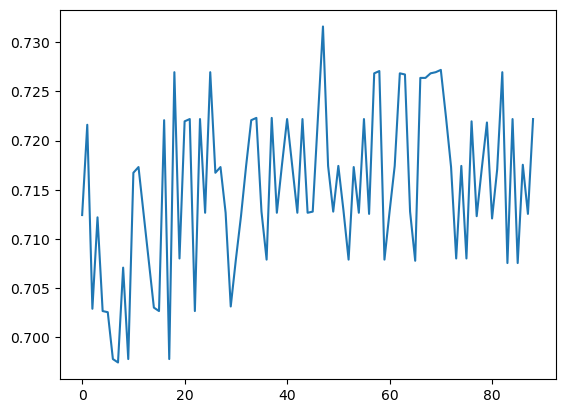

89
[89, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.7175377468060395]


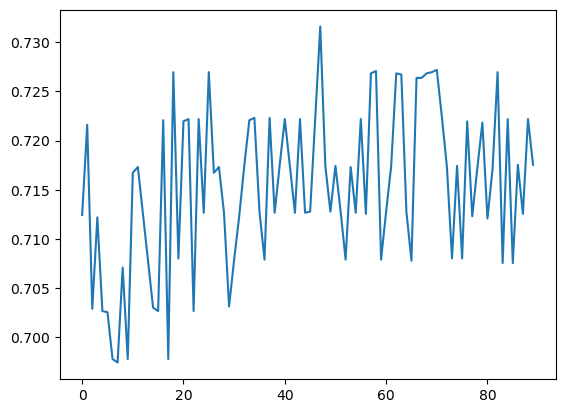

90
[90, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0], 0.7175377468060395]


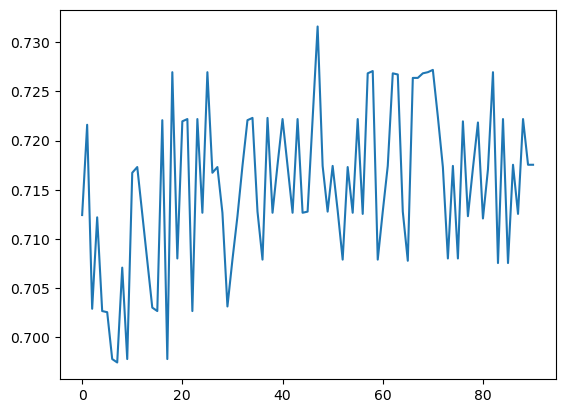

91
[91, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.7173054587688734]


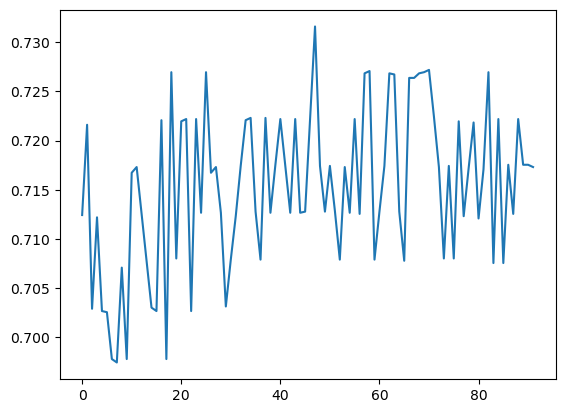

92
[92, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.726945412311266]


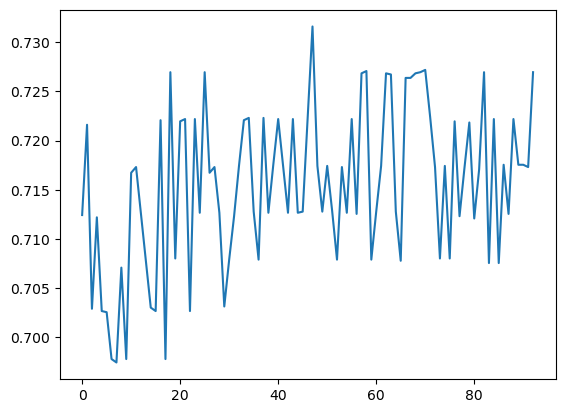

93
[93, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.7317073170731707]


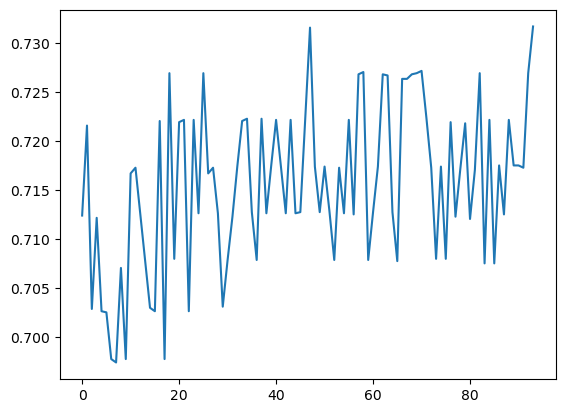

94
[94, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.7362369337979094]


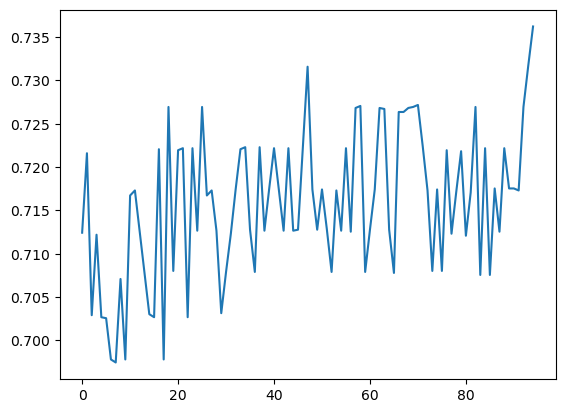

95
[95, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.7127758420441348]


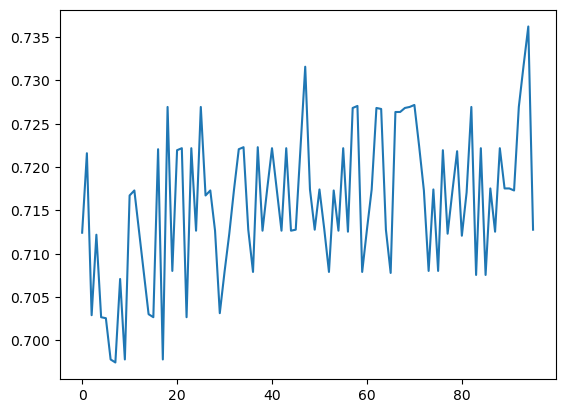

96
[96, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.7173054587688734]


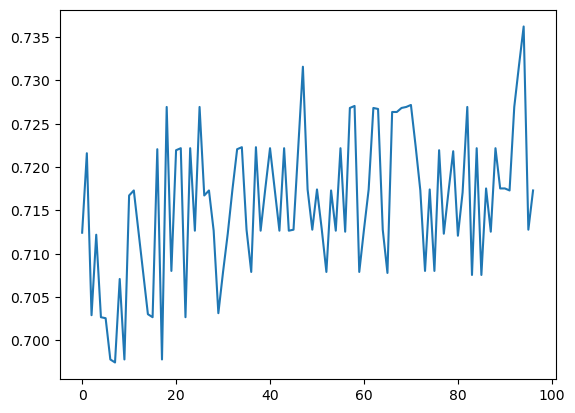

97
[97, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.7126596980255517]


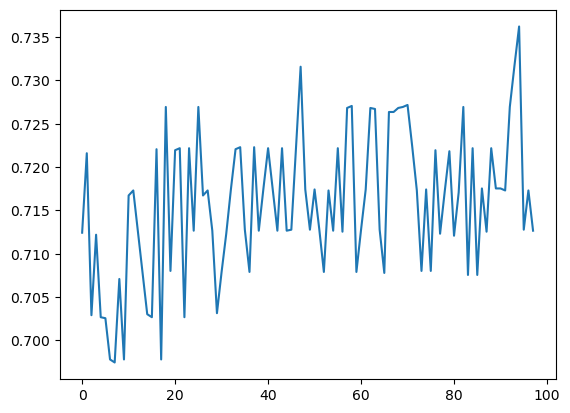

98
[98, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.7126596980255517]


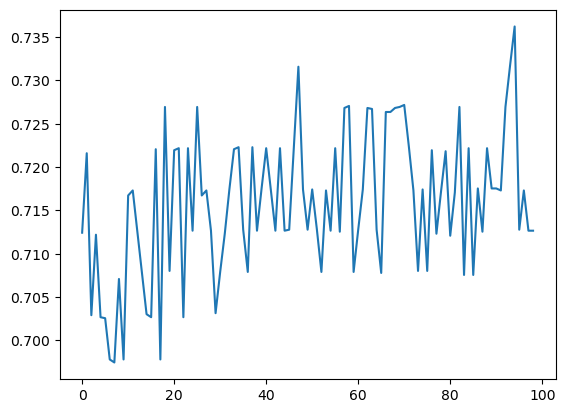

99
[99, [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 0.7126596980255517]


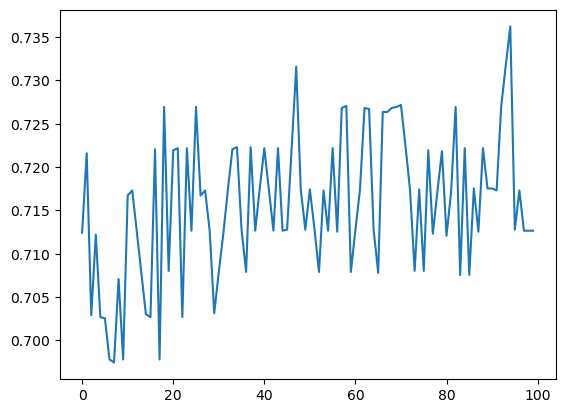

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import tree
from sklearn.model_selection import cross_val_score

data = pd.read_csv('data/sonar.all-data',header=None,sep=',')
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()

iterations = 100 # 迭代次数
pop_size = 100   # 种群大小，多少个染色体
pc = 0.25   # 交叉概率
pm = 0.01   # 变异概率

chrom_length = len(data.columns)-1    # 染色体长度
pop = []    # 种群
fitness_list = []   # 适应度
ratio_list = []     # 累计概率


# 初始化种群
def geneEncoding():
    i = 0
    while i < pop_size:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            i += 1
            pop.append(temp)
        

# 计算适应度
def calFitness():
    fitness_list.clear()
    for i in range(pop_size):   # 计算种群中每条染色体的适应度
        X_test = X

        has_1 = False
        for j in range(chrom_length):
            if pop[i][j] == 0:
                X_test =X_test.drop(columns = j)
            else:
                has_1 = True
        X_test = X_test.values
        
        if has_1:
            clf = tree.DecisionTreeClassifier() # 决策树作为分类器
            fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
            fitness_list.append(fitness)
        else:
            fitness = 0     # 全0的适应度为0
            fitness_list.append(fitness)

# 计算适应度的总和
def sumFitness():
    total = 0
    for i in range(pop_size):
        total += fitness_list[i]
    return total

# 计算每条染色体的累计概率
def getRatio():
    ratio_list.clear()
    ratio_list.append(fitness_list[0])
    for i in range(1, pop_size):
        ratio_list.append(ratio_list[i-1] + fitness_list[i])
    ratio_list[-1] = 1

# 选择
def selection():
    global pop
    total_fitness = sumFitness()
    for i in range(pop_size):
        fitness_list[i] = fitness_list[i] / total_fitness
    getRatio()
    
    rand_ratio = [] # 随机概率
    for i in range(pop_size):
        rand_ratio.append(random.random())
    rand_ratio.sort()

    new_pop = []    # 新种群
    i = 0  # 已经处理的随机概率数
    j = 0  # 超出范围的染色体数
   
    while i < pop_size:
        if rand_ratio[i] < ratio_list[j]:   # 随机数在第j个染色体的概率范围内
            new_pop.append(pop[j])
            i += 1
        else:
            j += 1

    pop = new_pop

# 交叉
def crossover():
    for i in range(pop_size-1): # 若交叉，则染色体i与染色体i+1交叉
        if random.random() < pc:# 发生交叉
            cpoint = random.randint(0, chrom_length-1)    # 随机选择交叉点
            temp1 = []
            temp2 = []
            temp1.extend(pop[i][:cpoint])
            temp1.extend(pop[i+1][cpoint:])
            temp2.extend(pop[i+1][:cpoint])
            temp2.extend(pop[i][cpoint:])
            pop[i] = temp1
            pop[i+1] = temp2

# 变异
def mutation():
    for i in range(pop_size):
        if random.random() < pm: # 发生变异
            mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
            if pop[i][mpoint] == 1:
                pop[i][mpoint] = 0
            else:
                pop[i][mpoint] = 1

# 最优解
def getBest():
    best_chrom = pop[0]
    best_fitness = fitness_list[0]
    for i in range(1,pop_size):
        if fitness_list[i] > best_fitness:
            best_fitness = fitness_list[i]  # 最佳适应值
            best_chrom = pop[i] # 最佳染色体

    return best_chrom, best_fitness

if __name__=='__main__':
    
    plt.xlabel('iterations')
    plt.ylabel('best fitness')
    plt.xlim((0,iterations))    # x坐标范围
    plt.ylim((0,1)) # y坐标范围
    px = []
    py = []
    plt.ion()
    
    results = []
    geneEncoding() # 初始化种群
    for i in range(iterations):
        print(i)
        
        calFitness() # 计算种群中每条染色体适应度
        
        best_chrom, best_fitness = getBest()
        results.append([i, best_chrom, best_fitness])
        
        selection() # 选择
        crossover() # 交叉
        mutation()  # 变异

        print([i, best_chrom, best_fitness])
        
        px.append(i)    # 画图
        py.append(best_fitness)
        plt.plot(px,py)
        plt.show()
        plt.pause(0.001)
        


 [遗传算法（Genetic Algorithm） ](https://www.cnblogs.com/holaworld/p/12470176.html)

遗传算法进行特征选择


[98, [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], 0.7076655052264809]


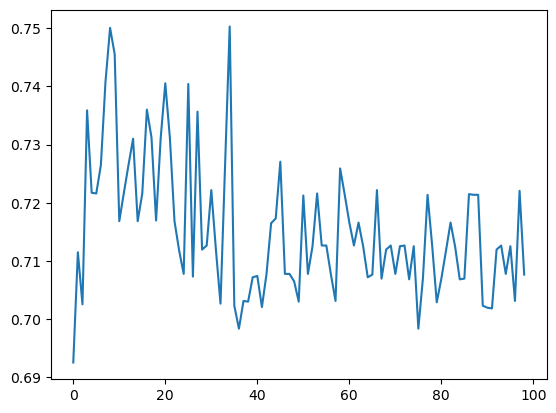

99
[99, [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], 0.7219512195121951]


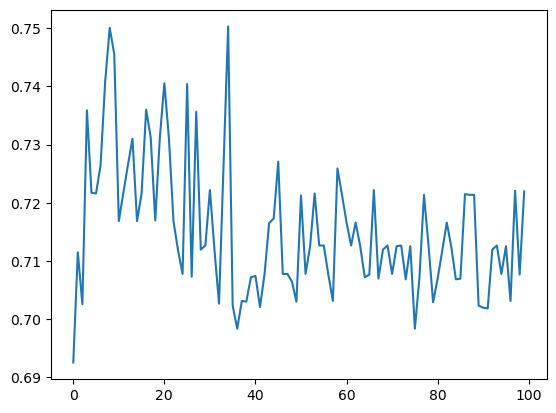

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import tree
from sklearn.model_selection import cross_val_score

data = pd.read_csv('data/sonar.all-data',header=None,sep=',')
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.flatten()

iterations = 100 # 迭代次数
pop_size = 100   # 种群大小，多少个染色体
pc = 0.25   # 交叉概率
pm = 0.01   # 变异概率

chrom_length = len(data.columns)-1    # 染色体长度
pop = []    # 种群
fitness_list = []   # 适应度
ratio_list = []     # 累计概率


# 初始化种群
def geneEncoding():
    i = 0
    while i < pop_size:
        temp = []
        has_1 = False   # 这条染色体是否有1
        for j in range(chrom_length):
            rand = random.randint(0,1)
            if rand == 1:
                has_1 = True
            temp.append(rand)
        if has_1:   # 染色体不能全0
            i += 1
            pop.append(temp)
        

# 计算适应度
def calFitness():
    fitness_list.clear()
    for i in range(pop_size):   # 计算种群中每条染色体的适应度
        X_test = X

        has_1 = False
        for j in range(chrom_length):
            if pop[i][j] == 0:
                X_test =X_test.drop(columns = j)
            else:
                has_1 = True
        X_test = X_test.values
        
        if has_1:
            clf = tree.DecisionTreeClassifier() # 决策树作为分类器
            fitness = cross_val_score(clf, X_test, y, cv=5).mean()  # 5次交叉验证
            fitness_list.append(fitness)
        else:
            fitness = 0     # 全0的适应度为0
            fitness_list.append(fitness)

# 计算适应度的总和
def sumFitness():
    total = 0
    for i in range(pop_size):
        total += fitness_list[i]
    return total

# 计算每条染色体的累计概率
def getRatio():
    ratio_list.clear()
    ratio_list.append(fitness_list[0])
    for i in range(1, pop_size):
        ratio_list.append(ratio_list[i-1] + fitness_list[i])
    ratio_list[-1] = 1

# 选择
def selection():
    global pop
    total_fitness = sumFitness()
    for i in range(pop_size):
        fitness_list[i] = fitness_list[i] / total_fitness
    getRatio()
    
    rand_ratio = [] # 随机概率
    for i in range(pop_size):
        rand_ratio.append(random.random())
    rand_ratio.sort()

    new_pop = []    # 新种群
    i = 0  # 已经处理的随机概率数
    j = 0  # 超出范围的染色体数
   
    while i < pop_size:
        if rand_ratio[i] < ratio_list[j]:   # 随机数在第j个染色体的概率范围内
            new_pop.append(pop[j])
            i += 1
        else:
            j += 1

    pop = new_pop

# 交叉
def crossover():
    for i in range(pop_size-1): # 若交叉，则染色体i与染色体i+1交叉
        if random.random() < pc:# 发生交叉
            cpoint = random.randint(0, chrom_length-1)    # 随机选择交叉点
            temp1 = []
            temp2 = []
            temp1.extend(pop[i][:cpoint])
            temp1.extend(pop[i+1][cpoint:])
            temp2.extend(pop[i+1][:cpoint])
            temp2.extend(pop[i][cpoint:])
            pop[i] = temp1
            pop[i+1] = temp2

# 变异
def mutation():
    for i in range(pop_size):
        if random.random() < pm: # 发生变异
            mpoint = random.randint(0, chrom_length-1)  # 随机选择变异点
            if pop[i][mpoint] == 1:
                pop[i][mpoint] = 0
            else:
                pop[i][mpoint] = 1

# 最优解
def getBest():
    best_chrom = pop[0]
    best_fitness = fitness_list[0]
    for i in range(1,pop_size):
        if fitness_list[i] > best_fitness:
            best_fitness = fitness_list[i]  # 最佳适应值
            best_chrom = pop[i] # 最佳染色体

    return best_chrom, best_fitness

if __name__=='__main__':
    
    plt.xlabel('iterations')
    plt.ylabel('best fitness')
    plt.xlim((0,iterations))    # x坐标范围
    plt.ylim((0,1)) # y坐标范围
    px = []
    py = []
    plt.ion()
    
    results = []
    geneEncoding() # 初始化种群
    for i in range(iterations):
        print(i)
        
        calFitness() # 计算种群中每条染色体适应度
        
        best_chrom, best_fitness = getBest()
        results.append([i, best_chrom, best_fitness])
        
        selection() # 选择
        crossover() # 交叉
        mutation()  # 变异

        print([i, best_chrom, best_fitness])
        
        px.append(i)    # 画图
        py.append(best_fitness)
        plt.plot(px,py)
        plt.show()
        plt.pause(0.001)
        


In [1]:
from sklearn.datasets import load_breast_cancer
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop(['target'], axis=1)
y = df['target'].astype(float)
estimator = DecisionTreeClassifier()
model = GeneticSelectionCV(
  estimator, cv=5, verbose=0,
  scoring="accuracy", max_features=5,
  n_population=100, crossover_proba=0.5,
  mutation_proba=0.2, n_generations=50,
  crossover_independent_proba=0.5,
  mutation_independent_proba=0.04,
  tournament_size=3, n_gen_no_change=10,
  caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])

Features: Index(['mean perimeter', 'compactness error', 'worst radius', 'worst texture',
       'worst concave points'],
      dtype='object')
